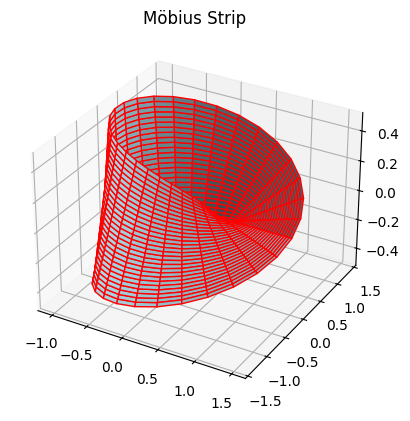

surface area:  6.761161245099823
edge length:  12.980037049685954


In [5]:
import matplotlib.pyplot as plt
import numpy as np

class MobiusStrip:
    def __init__(self, R, w, n):
        self.R = R  # Radius R (distance from the center to the strip)
        self.w = w  # Width w (strip width)
        self.n = n  # Resolution n (number of points in the mesh)
        self.generate_mesh()    # computes 3D mesh/grid of (x, y, z) points on the surface

    def generate_mesh(self):
        u = np.linspace(0, 2 * np.pi, self.n)   # walking along the loop
        v = np.linspace(-self.w / 2, self.w / 2, self.n)    # stepping side to side across the strip.
        self.u, self.v = np.meshgrid(u, v)  # create a matrix of u,v values
        self.x = (self.R + self.v * np.cos(self.u / 2)) * np.cos(self.u) # parametric equation of x axis
        self.y = (self.R + self.v * np.cos(self.u / 2)) * np.sin(self.u) # parametric equation of y axis
        self.z = self.v * np.sin(self.u / 2) # parametric equation of z axis
        
    def plot(self):
        fig = plt.figure() # figure window - using matplotlib.pyplot
        ax = plt.axes(projection="3d") # telling matplotlib that you want to plot a 3d plot
        ax.plot_surface(self.x, self.y, self.z, color='lightblue', edgecolor='red') # plots a 3d surface
        ax.set_title("Möbius Strip") # title for the plotted picture/diagram
        plt.show() # shows the resultant plot

    def compute_surface_area(self):
        du = 2 * np.pi / (self.n - 1) # dividing u into smaller pieces 
        dv = self.w / (self.n - 1)  # dividing v into smaller pieces

        # Compute partial derivatives using np.gradient
        dxu, dxv = np.gradient(self.x, du, dv, edge_order=2) # partial derivative of x w.r.t  u & v
        dyu, dyv = np.gradient(self.y, du, dv, edge_order=2) # partial derivative of y w.r.t  u & v
        dzu, dzv = np.gradient(self.z, du, dv, edge_order=2) # partial derivative of z w.r.t  u & v

        cross_x = dyu * dzv - dzu * dyv # cross product of dxu, dxv
        cross_y = dzu * dxv - dxu * dzv # cross product of dyu, dyv
        cross_z = dxu * dyv - dyu * dxv # cross product of dzu, dzv

        area_density = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2) # find the magnitude &
        return np.sum(area_density) * du * dv   # multiply with du and dv
    
    def compute_edge_length(self):
        # Edge v = -w/2 and v = +w/2
        edge1 = np.array([self.x[0], self.y[0], self.z[0]]) # find the left edge
        edge2 = np.array([self.x[-1], self.y[-1], self.z[-1]]) # find the right edge
        
        def compute_length(edge):
            diff = np.diff(edge, axis=1) # finds the difference between consecutive two points on the edge
            segment_lengths = np.sqrt((diff**2).sum(axis=0)) # finding the edge length by summing of the squares of the differences
            return np.sum(segment_lengths)  # return the resultant length

        return compute_length(edge1) + compute_length(edge2) # sum of both the edges

# main function
obj = MobiusStrip(1, 1, 30) # create an instance for the class
obj.plot() # plot the mobius strip
print("surface area: ",obj.compute_surface_area()) # print the surface area of the strip
print("edge length: ",obj.compute_edge_length()) # print the edge length of the strip